In [8]:
from math import log

next_x = 0.001  # We start the search at x=6
gamma = 0.0001  # Step size multiplier
precision = 0.00001  # Desired precision of result
max_iters = 1000000  # Maximum number of iterations

# Derivative function
def df(x):
    return -(log(x) + 1)/log(2)


for _ in range(max_iters):
    current_x = next_x
    next_x = current_x + gamma * df(current_x)

    step = next_x - current_x
    if abs(step) <= precision:
        break

print("Maximum at ", next_x)

# The output for the above will be something like
# "Minimum at 2.2499646074278457"

Maximum at  0.34325704792422246


In [12]:
import random
import sys
sys.path.append("./git/")
import matplotlib.pyplot as plt

# Gradient Descent

What are *actually* trying to do when you try to find the best model or the best solution to whatever problem you are trying to solve?

Normally, or at least very very often, what are you are trying to do is minimise some kind of error function. Put plainly, you're trying to minimise how wrong your model is, or maximise how likely your model is to be right.

This is fundamentally an *optimisation* problem, and optimisation problems are typically solved via **gradient descent**.

## The basic concept

Suppose you have some function `f` that takes as input a vector of real numbers and outputs a single real number (a scalar).

It might look like this:

In [13]:
from scratch.linear_algebra import Vector, dot
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in vector v"""
    return dot(v,v)

Maximising or minimising such functions is often the name of the game: what input value(s) of vector `v` produces the largest or smallest possible output?

For functions like this one the *gradient* gives the direction in which the function most quickly increases.

So let's say that you want to find the minimum value for `v`. One way to do it is to pick a random starting point, work out the gradient at that point, take a step in that direction, and then repeat.

If instead you wanted to find the maximum point, you could pick a random starting point, work out the gradient at that point, and take a small step in the *opposite* direction, then repeat.

## Estimating the gradient

If `f` is a function of one variable then its derivative at point `x` measures how much `f(x)` changes when we change `x`.

In [14]:
from typing import Callable

def difference_quotient(f: Callable[[float],float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

Computers don't do continua, and therefore can't do proper mathematical limits, but what they can do is compute for very very very very small values of `h`. So small that for our purposes they're the same thing.

In [15]:
def square(x: float) -> float:
    return x*x
def derivative(x: float) -> float:
    return 2 * x

In [16]:
xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square,x,h=0.001) for x in xs]

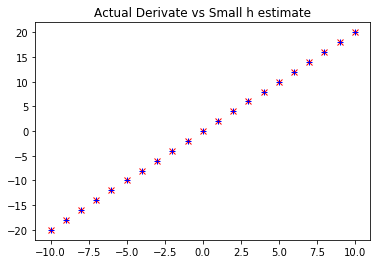

In [17]:
plt.title("Actual Derivate vs Small h estimate")
plt.plot(xs,actuals,'rx',label='Actual')
plt.plot(xs,estimates,'b+',label='Estimates')
plt.show()

But that's just when `f` is a function of a single variable.

When `f` is a function of multiple variables, it has multiple *partial derivates* rather than a single derivative,


Each partial derivative of `f(x1,x2,...)` is a measure of how much `f` changes with small changes in the inputs `x1`, `x2`, etc.

In [18]:
def partial_difference_quotient(f: Callable[[float],float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """
    Returns the i-th partial difference quotient of f at point v
    """
    w = [v_j + (h if j == i else 0)  # add h to the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

We can then use gradient descent in the exact same way:

In [19]:
def estimate_gradient(f: Callable[[Vector],float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f,v,i,h) 
            for i in range(len(v))]

## Using the gradient

Obviously the `sum_of_squares` function has a minimum of zero when all the values of the vector are 0. But let's imagine we didn't know that and had to figure that out.

Let's use gradient descent to find the minimum along all three-dimensional vectors.

Starting with a random point, then taking tiny steps:

In [20]:
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, 
                  gradient: 
                  Vector, 
                  step_size: float) -> float:
    """Takes a step of size step_size in the direction of gradient at point v"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size,gradient)
    return add(v,step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10,10) for _ in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # Compute gradient at v
    v = gradient_step(v,grad,-0.01) # Take a negative gradient step
    print(epoch,v)
    
assert distance(v,[0,0,0]) < 0.0001

0 [2.388924410367078, 2.2496262753028273, 7.1477139024897545]
1 [2.341145922159736, 2.2046337497967707, 7.004759624439959]
2 [2.2943230037165416, 2.160541074800835, 6.8646644319511605]
3 [2.2484365436422107, 2.1173302533048184, 6.727371143312137]
4 [2.2034678127693663, 2.074983648238722, 6.592823720445894]
5 [2.159398456513979, 2.0334839752739473, 6.460967246036977]
6 [2.1162104873836993, 1.9928142957684685, 6.331747901116237]
7 [2.073886277636025, 1.9529580098530992, 6.205112943093912]
8 [2.0324085520833046, 1.9138988496560372, 6.081010684232034]
9 [1.9917603810416384, 1.8756208726629164, 5.959390470547393]
10 [1.9519251734208056, 1.838108455209658, 5.840202661136445]
11 [1.9128866699523894, 1.801346286105465, 5.723398607913716]
12 [1.8746289365533417, 1.7653193603833557, 5.608930635755442]
13 [1.8371363578222748, 1.7300129731756886, 5.496752023040333]
14 [1.8003936306658292, 1.6954127137121748, 5.386816982579527]
15 [1.7643857580525126, 1.6615044594379313, 5.279080642927936]
16 [1.72

## Choosing the right step size

This is more of an art than a science.

Too small, and your gradient descent will take forever.

Too big, and you may overshoot your target and never find the minimum (or maximum).

## Using gradient descent to fit models

This book uses gradient descent to work fit paramterised (?) models to data. Typically this means that we have some dataset and some theory/model for the data that depends in a way that is differentiable on one or more parameters.

We'll also have a *loss* function or error function or cost function that we are trying to minimise.

A basic example:

In [21]:
inputs = [(x,20 * x + 5) for x in range(-50,50)]
inputs

[(-50, -995),
 (-49, -975),
 (-48, -955),
 (-47, -935),
 (-46, -915),
 (-45, -895),
 (-44, -875),
 (-43, -855),
 (-42, -835),
 (-41, -815),
 (-40, -795),
 (-39, -775),
 (-38, -755),
 (-37, -735),
 (-36, -715),
 (-35, -695),
 (-34, -675),
 (-33, -655),
 (-32, -635),
 (-31, -615),
 (-30, -595),
 (-29, -575),
 (-28, -555),
 (-27, -535),
 (-26, -515),
 (-25, -495),
 (-24, -475),
 (-23, -455),
 (-22, -435),
 (-21, -415),
 (-20, -395),
 (-19, -375),
 (-18, -355),
 (-17, -335),
 (-16, -315),
 (-15, -295),
 (-14, -275),
 (-13, -255),
 (-12, -235),
 (-11, -215),
 (-10, -195),
 (-9, -175),
 (-8, -155),
 (-7, -135),
 (-6, -115),
 (-5, -95),
 (-4, -75),
 (-3, -55),
 (-2, -35),
 (-1, -15),
 (0, 5),
 (1, 25),
 (2, 45),
 (3, 65),
 (4, 85),
 (5, 105),
 (6, 125),
 (7, 145),
 (8, 165),
 (9, 185),
 (10, 205),
 (11, 225),
 (12, 245),
 (13, 265),
 (14, 285),
 (15, 305),
 (16, 325),
 (17, 345),
 (18, 365),
 (19, 385),
 (20, 405),
 (21, 425),
 (22, 445),
 (23, 465),
 (24, 485),
 (25, 505),
 (26, 525),
 (27, 

We already know the relationship between input and output but lets say we didn't and we wanted to learn it from the data. Let's use gradient descent to find the slope and intercept that minimise the average squared error.

Starting off with a function that determines the gradient based on the error from a single data point:

In [22]:
def linear_gradient(x: float,
                    y: float,
                    theta: Vector) -> Vector:
    slope,intercept = theta
    predicted = slope * x + intercept # Prediction of the model.
    error = (predicted - y)           # error is (pred - actual).
    squared_error = error ** 2        # Minimise the squared error
    grad = [2 * error * x, 2 * error] # using its gradient.
    return grad

Let's try to develop some intuition.

Imagine for some `x` our prediction is too large. In that case the `error` is positive. The second gradient term, `2 * error` is also positive, which reflects the fact that small increases in the intercept will make the already too large prediction even larger, which means the squared error will get even bigger.

The first gradient term, `2 * error * x` has the same sign as `x`. This means that if `x` is positive, small increases in the slope will make the prediction and hence the error even larger. If `x` is negative however small increases in the slope will make the prediction and hence the error smaller.

But that's all for a single data point.

For a whole dataset we'd look at the *mean squared error*. The gradient of the mean squared error is the mean of the individual gradients.

Here are the steps then:

    1- pick a random value for `theta`
    2- compute the mean of the gradients
    3- adjust `theta` in that direction
    4- repeat!

After many 'epochs' we should learn something like the correct parameters:

In [23]:
from scratch.linear_algebra import vector_mean

theta = [random.uniform(-1,1),random.uniform(-1,1)]
learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x,y,theta) 
                        for x,y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta,grad,-learning_rate)
    print(epoch,theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.53210060286433, 0.13066013073645033]
1 [10.969219558020232, 0.15393091107784174]
2 [26.01868448571159, 0.1545922688137063]
3 [15.980692040299184, 0.1703017687617904]
4 [22.676048710889205, 0.17594185726456604]
5 [18.210251451694166, 0.18826602226092615]
6 [21.18895054774225, 0.1960997416680985]
7 [19.202166084397586, 0.20689649273250443]
8 [20.52736211819954, 0.21568486583143698]
9 [19.64346515202674, 0.22578085821797358]
10 [20.233034524456382, 0.2349727616535644]
11 [19.839800944949246, 0.24473585065471362]
12 [20.102097505569507, 0.25408617989835347]
13 [19.927155049965037, 0.2636801050441263]
14 [20.043851261778364, 0.27307989988400305]
15 [19.966024288293713, 0.2825775913460134]
16 [20.01794437729944, 0.2919784604516151]
17 [19.983323078801725, 0.30141244790801136]
18 [20.00642491888716, 0.31079294609099706]
19 [19.991025372048355, 0.3201777851177023]
20 [20.001306254628865, 0.3295284549195152]
21 [19.994458256617467, 0.338870704264305]
22 [19.999035213540413, 0.348187421112

644 [19.99919542421365, 3.660380832497469]
645 [19.999197032881995, 3.663059266256688]
646 [19.999198638333965, 3.6657323447570564]
647 [19.999200240576002, 3.668400078705876]
648 [19.999201839614514, 3.6710624787890405]
649 [19.999203435455907, 3.673719555671077]
650 [19.99920502810658, 3.676371319995191]
651 [19.999206617572906, 3.679017782383307]
652 [19.999208203861254, 3.6816589534361133]
653 [19.99920978697798, 3.6842948437331025]
654 [19.999211366929423, 3.686925463832614]
655 [19.999212943721908, 3.6895508242718784]
656 [19.99921451736176, 3.6921709355670567]
657 [19.999216087855274, 3.6947858082132843]
658 [19.999217655208746, 3.697395452684713]
659 [19.99921921942845, 3.6999998794345523]
660 [19.99922078052066, 3.702599098895112]
661 [19.999222338491617, 3.7051931214778424]
662 [19.99922389334757, 3.7077819575733786]
663 [19.999225445094744, 3.7103656175515796]
664 [19.999226993739356, 3.7129441117615714]
665 [19.99922853928761, 3.7155174505317876]
666 [19.999230081745697, 3.

1434 [19.999834460724607, 4.724377007046274]
1435 [19.999834791703734, 4.7249280874929065]
1436 [19.999835122021103, 4.725478066109624]
1437 [19.999835451678035, 4.726026945099426]
1438 [19.999835780675852, 4.726574726660906]
1439 [19.999836109015867, 4.72712141298826]
1440 [19.999836436699404, 4.727667006271299]
1441 [19.999836763727767, 4.728211508695456]
1442 [19.999837090102275, 4.7287549224417935]
1443 [19.999837415824224, 4.729297249687012]
1444 [19.99983774089493, 4.729838492603463]
1445 [19.999838065315686, 4.730378653359151]
1446 [19.999838389087795, 4.730917734117748]
1447 [19.999838712212558, 4.7314557370386]
1448 [19.999839034691263, 4.731992664276736]
1449 [19.999839356525204, 4.732528517982874]
1450 [19.999839677715674, 4.733063300303433]
1451 [19.999839998263948, 4.733597013380542]
1452 [19.999840318171326, 4.734129659352044]
1453 [19.99984063743908, 4.734661240351512]
1454 [19.999840956068486, 4.735191758508248]
1455 [19.999841274060827, 4.7357212159473]
1456 [19.999841

2143 [19.99995994653184, 4.933310951451141]
2144 [19.999960026614716, 4.93344428949477]
2145 [19.99996010653748, 4.933577360942396]
2146 [19.999960186300445, 4.933710166327049]
2147 [19.99996026590393, 4.933842706180695]
2148 [19.99996034534826, 4.933974981034237]
2149 [19.999960424633745, 4.934106991417517]
2150 [19.99996050376071, 4.9342387378593155]
2151 [19.999960582729464, 4.934370220887358]
2152 [19.999960661540335, 4.934501441028313]
2153 [19.999960740193625, 4.934632398807796]
2154 [19.99996081868966, 4.934763094750374]
2155 [19.999960897028746, 4.934893529379563]
2156 [19.999960975211206, 4.935023703217833]
2157 [19.999961053237342, 4.935153616786608]
2158 [19.99996113110748, 4.935283270606273]
2159 [19.99996120882192, 4.935412665196168]
2160 [19.999961286380977, 4.9355418010745975]
2161 [19.999961363784962, 4.93567067875883]
2162 [19.999961441034188, 4.9357992987650965]
2163 [19.999961518128963, 4.9359276616086]
2164 [19.99996159506959, 4.936055767803512]
2165 [19.99996167185

2929 [19.999991692869983, 4.9861686235320395]
2930 [19.999991709479254, 4.986196277977846]
2931 [19.999991726055317, 4.986223877131369]
2932 [19.999991742598233, 4.986251421103161]
2933 [19.99999175910808, 4.986278910003554]
2934 [19.999991775584913, 4.986306343942655]
2935 [19.999991792028805, 4.986333723030354]
2936 [19.999991808439816, 4.986361047376322]
2937 [19.999991824818018, 4.986388317090009]
2938 [19.99999184116347, 4.986415532280647]
2939 [19.999991857476246, 4.986442693057249]
2940 [19.9999918737564, 4.986469799528611]
2941 [19.99999189000401, 4.98649685180331]
2942 [19.999991906219126, 4.986523849989708]
2943 [19.999991922401833, 4.9865507941959475]
2944 [19.999991938552174, 4.986577684529958]
2945 [19.99999195467023, 4.98660452109945]
2946 [19.999991970756057, 4.986631304011921]
2947 [19.99999198680972, 4.986658033374653]
2948 [19.99999200283129, 4.986684709294713]
2949 [19.999992018820823, 4.986711331878955]
2950 [19.99999203477839, 4.986737901234018]
2951 [19.9999920507

3675 [19.999998133492312, 4.996892263580696]
3676 [19.999998137224207, 4.996898477187027]
3677 [19.99999814094864, 4.9969046783698765]
3678 [19.999998144665625, 4.996910867154085]
3679 [19.999998148375184, 4.9969170435644426]
3680 [19.999998152077318, 4.996923207625689]
3681 [19.999998155772055, 4.996929359362515]
3682 [19.999998159459402, 4.996935498799561]
3683 [19.999998163139377, 4.996941625961422]
3684 [19.999998166812, 4.996947740872638]
3685 [19.99999817047727, 4.996953843557705]
3686 [19.999998174135218, 4.996959934041067]
3687 [19.99999817778585, 4.99696601234712]
3688 [19.999998181429184, 4.996972078500212]
3689 [19.999998185065234, 4.9969781325246405]
3690 [19.999998188694015, 4.996984174444656]
3691 [19.999998192315537, 4.996990204284461]
3692 [19.99999819592982, 4.996996222068208]
3693 [19.99999819953688, 4.997002227820001]
3694 [19.999998203136723, 4.997008221563898]
3695 [19.99999820672937, 4.997014203323907]
3696 [19.999998210314835, 4.997020173123989]
3697 [19.99999821

4402 [19.999999564364455, 4.999274666556997]
4403 [19.999999565235466, 4.999276116788248]
4404 [19.999999566104734, 4.9992775641199065]
4405 [19.999999566972264, 4.999279008557772]
4406 [19.999999567838056, 4.999280450107628]
4407 [19.999999568702126, 4.999281888775251]
4408 [19.99999956956446, 4.999283324566402]
4409 [19.99999957042507, 4.999284757486834]
4410 [19.999999571283965, 4.999286187542285]
4411 [19.99999957214114, 4.999287614738485]
4412 [19.9999995729966, 4.999289039081149]
4413 [19.99999957385035, 4.999290460575983]
4414 [19.999999574702393, 4.999291879228681]
4415 [19.99999957555273, 4.999293295044926]
4416 [19.999999576401372, 4.999294708030389]
4417 [19.999999577248314, 4.999296118190729]
4418 [19.999999578093565, 4.999297525531596]
4419 [19.999999578937125, 4.999298930058627]
4420 [19.999999579778997, 4.999300331777447]
4421 [19.999999580619185, 4.999301730693671]
4422 [19.999999581457697, 4.999303126812903]
4423 [19.999999582294528, 4.9993045201407345]
4424 [19.999999

# Mini-batch and Stochastic Gradient Descent

## Minibatch descent

The above method has a drawback: you have to calculate the `error` across the whole dataset every `epoch`. That is, you work out the error across your whole dataset everytime you figure out which direction to take a step in. This doesn't scale well! 

So what alrernatives are there that are better suited to larger datasets?

One option is **minibatch gradient descent**.

This is where you compute the gradient (and take a little step) based on a sample of the whole dataset.

In [24]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # For generic functions 

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start index at 0, batch_size, 2 * batch_size ...
    batch_starts = [start for start 
                    in range(0,len(dataset),batch_size)]
    
    if shuffle: 
        random.shuffle(batch_starts)
    
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

Note: The TypeVar(T) allows us to create a “generic” function. It says that our dataset can be a list of any single type—strs, ints, lists, whatever—but whatever that type is, the outputs will be batches of it.

Now you can apply the same gradient descent steps on the smaller batches:

In [25]:
inputs = [(x,20 * x + 5) for x in range(-50,50)]
theta = [random.uniform(-1,1),random.uniform(-1,1)]

for epoch in range(1000):
    for batch in minibatches(inputs,batch_size=20):
        grad = vector_mean([linear_gradient(x,y,theta) 
                            for x,y in batch])
        theta = gradient_step(theta,grad,-learning_rate)
        
slope, intercept = theta

assert 19.1 < slope < 20.1
assert 4.9 < intercept < 5.1

In [26]:
vector_mean??

## Stochastic descent

This is another variation in which you take steps based on one training example at at a time.

In [27]:
theta = [random.uniform(-1,1),random.uniform(-1,1)]

for epoch in range(100):
    for x,y in inputs:
        grad = linear_gradient(x,y,theta)
        theta = gradient_step(theta,grad,-learning_rate)
    print(epoch,theta)
    
slope, intercept = theta

0 [20.102559266669466, -0.10458932255186608]
1 [20.098158436532668, 0.11441678047771778]
2 [20.093947057297676, 0.32402668450661815]
3 [20.08991638744952, 0.5246435349372871]
4 [20.08605862604349, 0.7166531676059286]
5 [20.08236639480454, 0.9004248644747439]
6 [20.07883257931432, 1.0763120644535065]
7 [20.075450356306558, 1.2446530417669226]
8 [20.072213248441674, 1.4057715574491494]
9 [20.06911503050762, 1.5599774824905859]
10 [20.066149727930263, 1.7075673929595714]
11 [20.06331165675488, 1.8488251407759442]
12 [20.060595346105867, 1.9840223996633448]
13 [20.057995571491258, 2.113419187236795]
14 [20.055507361876863, 2.2372643659949483]
15 [20.053125888551364, 2.3557961209476046]
16 [20.050846574536425, 2.469242417328701]
17 [20.048665066753856, 2.5778214404709083]
18 [20.04657715175666, 2.6817420149839832]
19 [20.044578810833677, 2.7812040056754292]
20 [20.042666226169544, 2.876398702888317]
21 [20.040835674426372, 2.9675091894480574]
22 [20.039083671855725, 3.054710693131399]
23 [2

Stochastic gradient descent can find the minimum in a much smaller number of epochs, but can be sensitive to the scattering of a dataset.

In this context, the "redundancy" of a dataset is its tendency to cluster around certain points. Say you had 1000 points in your dataset, but all clustered around the points (10,10) (20,20) and (30,50). Calculating the error / squared error of your parameters is largely unnecessary - the same amount of useful infrmation could be achieved by calculating on a much smaller sample of teh whole set.